In [2]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)

In [47]:
Nx = 64
Ny = 1
Nz = 64
et = 1.0
N = 1
base_fn = 'output_travelling_vortex'
pydir = '../%s/' %base_fn

tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
tags = tc.get_tag_dict()

after_full_step


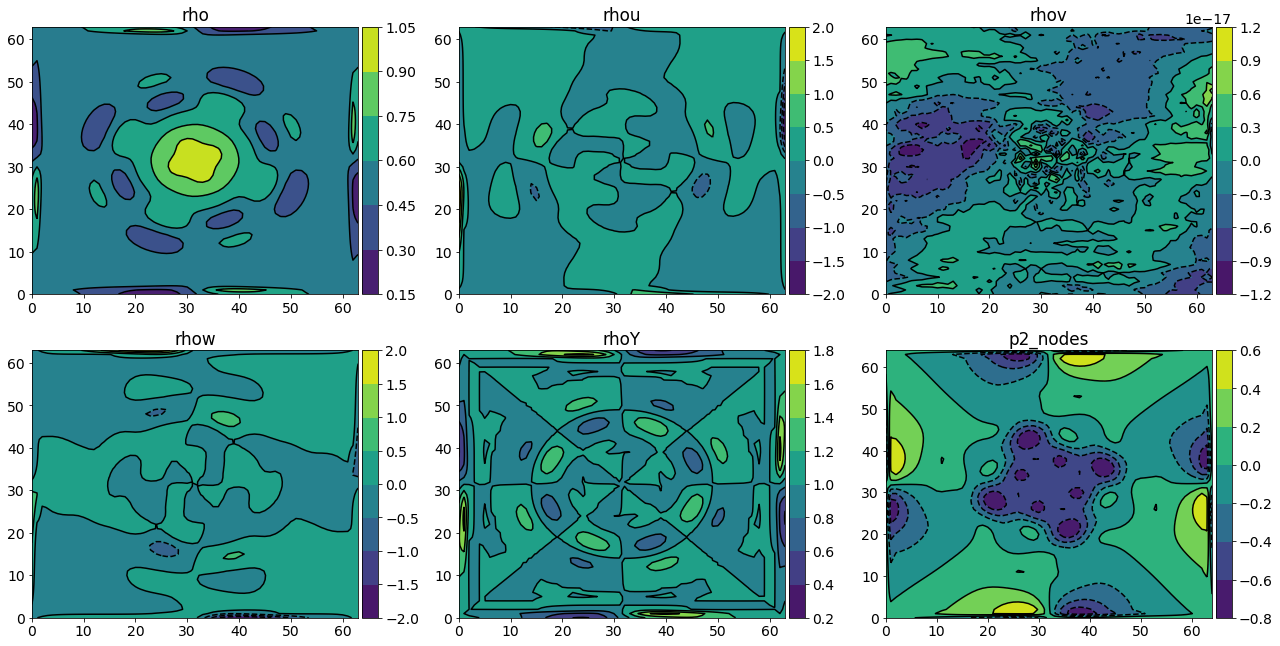

In [51]:
comp_sfx = '3D'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)
tag = tags[9]
print(tag)
# tag = 'ic'

attributes = ['rho','rhou','rhov','rhow','rhoY','p2_nodes']
# attributes = ['rho','rhoY','Y']
# attributes = ['rho']
times = [10] #, 150, 180, 260, 280]
# times = [165]
# times = [10]

H = 10.0
slc = 0
arr_lst = []
for time in times:
    for attribute in attributes:
        arr = tc.get_arr(path, time, N, attribute, label_type='WINDOW_STEP', tag=tag, inner=True, avg=False)[0][:,slc,:]

        if attribute == 'rho':
#             arr -= H
            rho = np.copy(arr)

        if attribute == 'rhoY':
            rhoY = np.copy(arr)
        arr_lst.append([arr,attribute])

#     Y = rhoY / (rho+1.0)
#     arr_lst.append([rho - H, 'rho, time-step=%i' %time])
pl = pt.plotter(arr_lst,ncols=3,figsize=(18,10))
_ = pl.plot(aspect='equal',method='contour')
